<a href="https://colab.research.google.com/github/Abdulrahman-Mohamed/sexual-harrasment-detection/blob/main/sexual_harassment_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('i just walked in the door ', 1), ('is it on the way to the airport ', 1), ('i know a strip club down there ', 1), ('or is nibbling out of the question too ', 1), ('where oh where is chels lol ', 1), ('if you want me to ', 1), ('u gon na fall asleep before i get there ', 1), ('giroud is so this is the chance of his lifetime vardy is also so', 0), ('did you like hearing me say i was going to kiss on u ', 1), ('u was mad at me ', 1), ('have you being alone before ', 1), ('so whats my percent at ', 1), ('but this will work out for the better now ', 1), ('and at my house i play madden on ps all day ', 1), ('guess i could teach you ', 1), ('so what do you want me to wear when i come over ', 1), ('something messed up on it and thats the only way i can fix it ', 1), ('chancellor angela merkel of germany met in berlin late monday with her', 0), ('anything is ok with me ', 1), ('just

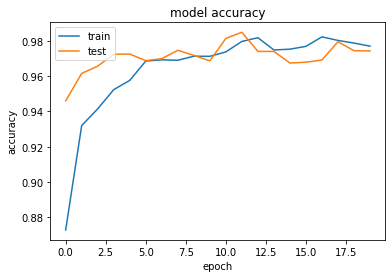

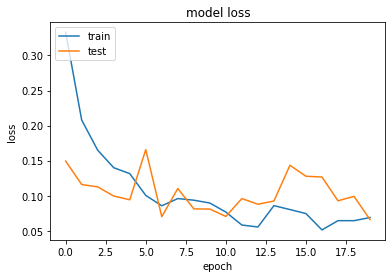

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import nltk
import csv
nltk.download('punkt')
import itertools
import random
import pandas as pd

maxlen = 50
labels = []
sentences = []
vocabulary_size = 8000
unknown_token = "UNKNOWN_TOKEN"

with open(r'/content/pan_test_cleaned.csv', 'r') as f:
    reader = csv.reader(f, skipinitialspace=True)
    data = []
    
    for x in reader:
        data.append((x[0].lower(),int(x[1])))
    random.shuffle(data)

        
    for d in data:
        labels.append(d[1])
        sentences.append(d[0])

with open(r'/content/PAN_TRAIN_FInal.csv','r') as f:
    reader = csv.reader(f, skipinitialspace=True,delimiter=",")
    data = []

    for x in reader:
        data.append((x[0].lower(),int(x[1])))
    random.shuffle(data)
    print(data)


        
    for d in data:
        labels.append(d[1])
        sentences.append(d[0])


tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]
# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
print("Found %d unique words tokens." % len(word_freq.items()))
 
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size - 1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i+1) for i,w in enumerate(index_to_word)])
for i, sent in enumerate(tokenized_sentences):
    tokenized_sentences[i] = [w if w in word_to_index else unknown_token for w in sent]

print("\nExample sentence: '%s'" % sentences[0])
print("\nExample sentence after Pre-processing: '%s'" % tokenized_sentences[0])

example_int = []
for example in tokenized_sentences:
    index = [word_to_index[w] for w in example]
    example_int.append(index)

labels = np.array(labels)

seq_length = 50
features =example_int


x_train, x_test, y_train, y_test = train_test_split( features, labels, test_size=0.1,random_state=42)

print(x_train[0],y_train[0])



vocab_size =vocabulary_size + 1  # Adding 1 because of reserved 0 index
print(vocabulary_size)

X_Train = pad_sequences(x_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(x_test, padding='post', maxlen=maxlen)



print(X_Train.shape,y_train.shape)


model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,400))
model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)))
model.add(keras.layers.Dense(64,activation="relu"))

model.add(keras.layers.Dense(1,activation="sigmoid"))
model.summary()
opt = keras.optimizers.Adam(0.01)

model.compile(optimizer=opt, loss="binary_crossentropy",metrics=["accuracy"])
earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=1, mode='min')
mcp_save = ModelCheckpoint(r'/content/first.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=40, min_lr=0.00001)
steps_per_epoch = len(X_Train)//64
validation_steps = len(X_test)//64 # if you have test data

history = model.fit(X_Train,y_train,epochs=20,steps_per_epoch=steps_per_epoch,batch_size=8,validation_split=0.33,callbacks=[earlyStopping, mcp_save, reduce_lr]
,validation_steps=20, verbose=1)


loss, accuracy = model.evaluate(X_Train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




